In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from matplotlib import pyplot as plt

NUM_OF_CLASSES = 10

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, NUM_OF_CLASSES)
y_test = to_categorical(y_test, NUM_OF_CLASSES)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [3]:
model = Sequential([
    Dense(200, activation='relu', input_shape=(28, 28)),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 200)           5800      
_________________________________________________________________
flatten (Flatten)            (None, 5600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               840150    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 847,460
Trainable params: 847,460
Non-trainable params: 0
_________________________________________________________________


In [4]:
opt = Adam(lr=0.005) 

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, batch_size=28, epochs=10)

Epoch 1/10
2143/2143 [==============================] - 16s 8ms/step - loss: 0.1819 - accuracy: 0.9443
Epoch 2/10
2143/2143 [==============================] - 16s 8ms/step - loss: 0.1019 - accuracy: 0.9696
Epoch 3/10
2143/2143 [==============================] - 17s 8ms/step - loss: 0.0749 - accuracy: 0.9780
Epoch 4/10
2143/2143 [==============================] - 15s 7ms/step - loss: 0.0653 - accuracy: 0.9808
Epoch 5/10
2143/2143 [==============================] - 16s 7ms/step - loss: 0.0526 - accuracy: 0.9843
Epoch 6/10
2143/2143 [==============================] - 20s 9ms/step - loss: 0.0485 - accuracy: 0.9866
Epoch 7/10
2143/2143 [==============================] - 16s 7ms/step - loss: 0.0508 - accuracy: 0.9874
Epoch 8/10
2143/2143 [==============================] - 15s 7ms/step - loss: 0.0402 - accuracy: 0.9896
Epoch 9/10
2143/2143 [==============================] - 15s 7ms/step - loss: 0.0465 - accuracy: 0.9892
Epoch 10/10
2143/2143 [==============================] - 18s 8ms/step - l

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2212 - accuracy: 0.9745


[0.2212458699941635, 0.9745000004768372]

In [10]:
CLASS_NAMES = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(CLASS_NAMES)

preds = model.predict(x_test)

preds_single = CLASS_NAMES[np.argmax(preds, axis = -1)]
actual_single = CLASS_NAMES[np.argmax(y_test, axis = -1)]

[0 1 2 3 4 5 6 7 8 9]


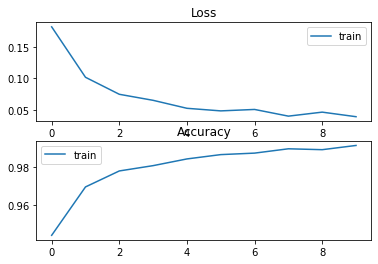

In [11]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()

# plot mse during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()

<class 'numpy.ndarray'>


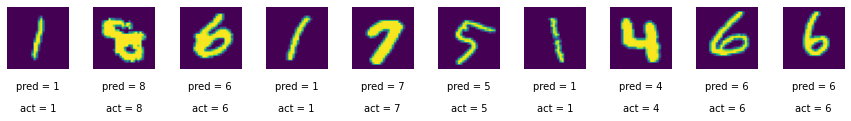

In [12]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)